<a href="https://colab.research.google.com/github/xcsengody/DP/blob/master/DatasetPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip -q install geoip2;
!apt-get -o Dpkg::Options::="--force-confmiss" install --reinstall netbase;

!pip -q install folium==0.2.1;

import sys
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
sys.path.append('/content/drive/My Drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks/Notebooks')

from lib.Config import *
from lib.DatasetPreprocessingController import *

def saveDocument(fileName):
  !jupyter nbconvert --log-level 0 --output {fileName} --output-dir='drive/My Drive/Colab Notebooks/Documents' "drive/My Drive/Colab Notebooks/Notebooks/DatasetPreprocessingController.ipynb"
  print("File saved to .../Colab Notebooks/Documents/{}.html".format(fileName))

In [0]:
path = resources_path+'GeoLite2-Country.mmdb';
reader=geoip2.database.Reader(path);

In [0]:
path = dataset_path+"Dataset/NUSW-NB15_features.csv";
df = pd.read_csv(path, delimiter=',', encoding='unicode_escape', low_memory=False, skipinitialspace=True, skip_blank_lines=True, verbose=True);
features = df.Name

Tokenization took: 0.07 ms
Type conversion took: 0.79 ms
Parser memory cleanup took: 0.01 ms


In [0]:
path = dataset_path+"Dataset/UNSW-NB15_3.csv";
dataset = pd.read_csv(path, delimiter=',', names=features, encoding='utf-8', low_memory=False, skipinitialspace=True, skip_blank_lines=True, verbose=True);

Tokenization took: 2415.66 ms
Type conversion took: 3279.15 ms
Parser memory cleanup took: 5.00 ms


In [0]:
print("Number of rows: {}\nNumber of features: {}".format(dataset.shape[0],dataset.shape[1]))

Number of rows: 700001
Number of features: 49


In [0]:
print("NaN columns {}".format(dataset.columns[dataset.isna().any()].tolist()))

NaN columns ['ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'attack_cat']


In [0]:
nan_rows = dataset[dataset.attack_cat.isnull()]
nan_norm = nan_rows[nan_rows.Label == 0]
nan_att = nan_rows[nan_rows.Label == 1]
print("Normal: {}\nAttack: {}".format(nan_norm.shape[0],nan_att.shape[0]))

Normal: 542576
Attack: 0


In [0]:
dataset.attack_cat = dataset.attack_cat.fillna('Normal')

In [0]:
dataset.state.value_counts()

FIN    326293
INT    248476
CON    122307
REQ      2542
RST       213
ECO       138
PAR        13
ACC         4
TXD         3
TST         3
ECR         3
no          2
MAS         2
URN         2
Name: state, dtype: int64

In [0]:
dataset = dataset[dataset.state.apply(lambda x: x != 'no')]

In [0]:
dataset.service = dataset.service.replace(to_replace ="-", value ="NUSER");

In [0]:
dataset[dataset.sport.apply(lambda x: x == '-')]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


In [0]:
dataset = dataset[dataset.sport.apply(lambda x: x != '-')]

In [0]:
dataset[dataset.dsport.apply(lambda x: x == '-')]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


In [0]:
dataset = dataset[dataset.dsport.apply(lambda x: x != '-')]

In [0]:
#dataset.sport = dataset.sport.apply(lambda x: int(x,16) if re.search('0x.*', x) else x)

In [0]:
dataset.dsport = dataset.dsport.apply(lambda x: int(x,16) if re.search('0x.*', x) else x)

In [0]:
dataset[dataset.sport.apply(lambda x: int(x) > 65535)]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


In [0]:
dataset[dataset.dsport.apply(lambda x: int(x) > 65535)]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


In [0]:
dataset = dataset[dataset.sport.apply(lambda x: int(x) <= 65535)]
dataset = dataset[dataset.dsport.apply(lambda x: int(x) <= 65535)]

In [0]:
dataset[dataset.dur.apply(lambda x: float(x) >= 8000)]

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label


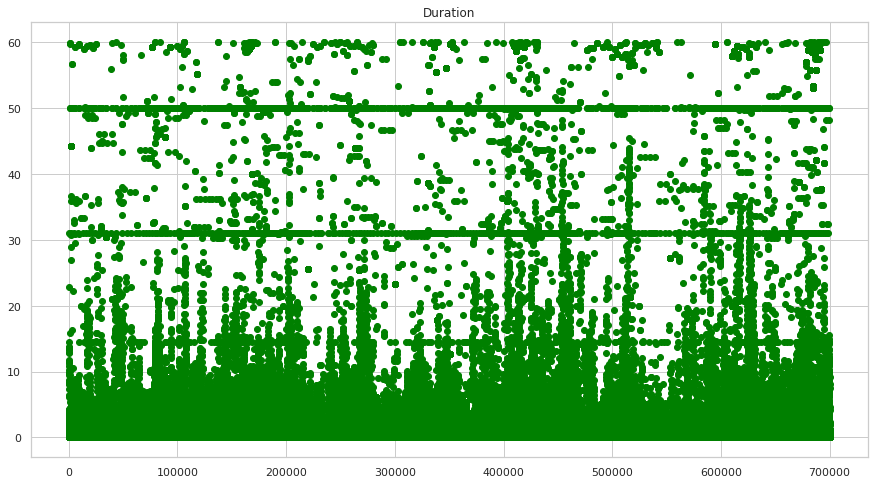

In [0]:
plt.figure()
plt.scatter(dataset.index, dataset.dur, label='Duration', marker='o', color="green")
plt.title("Duration")
plt.show()

In [0]:
dataset = dataset[dataset.dur.apply(lambda x: float(x) < 8000)]
q = dataset.dur.quantile(0.999995)
test_d=dataset[dataset.dur < q]

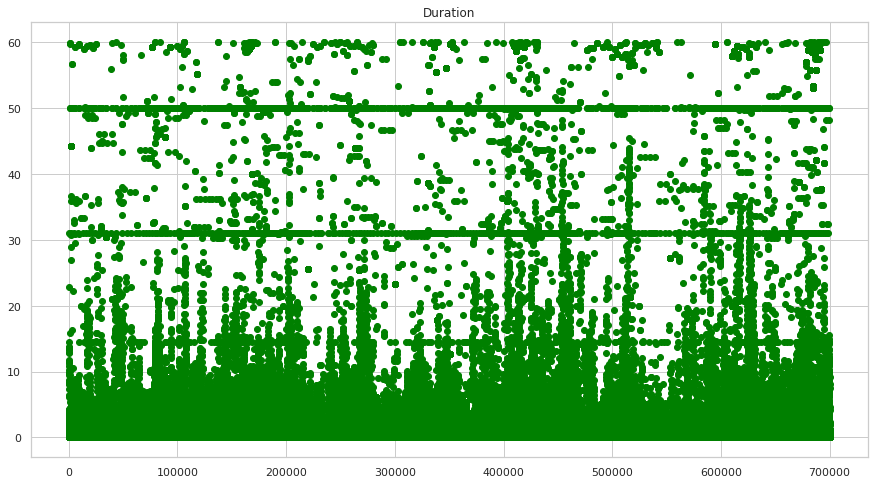

In [0]:
plt.figure()
plt.scatter(dataset.index, dataset.dur, label='Duration', marker='o', color="green")
plt.title("Duration")
plt.show()

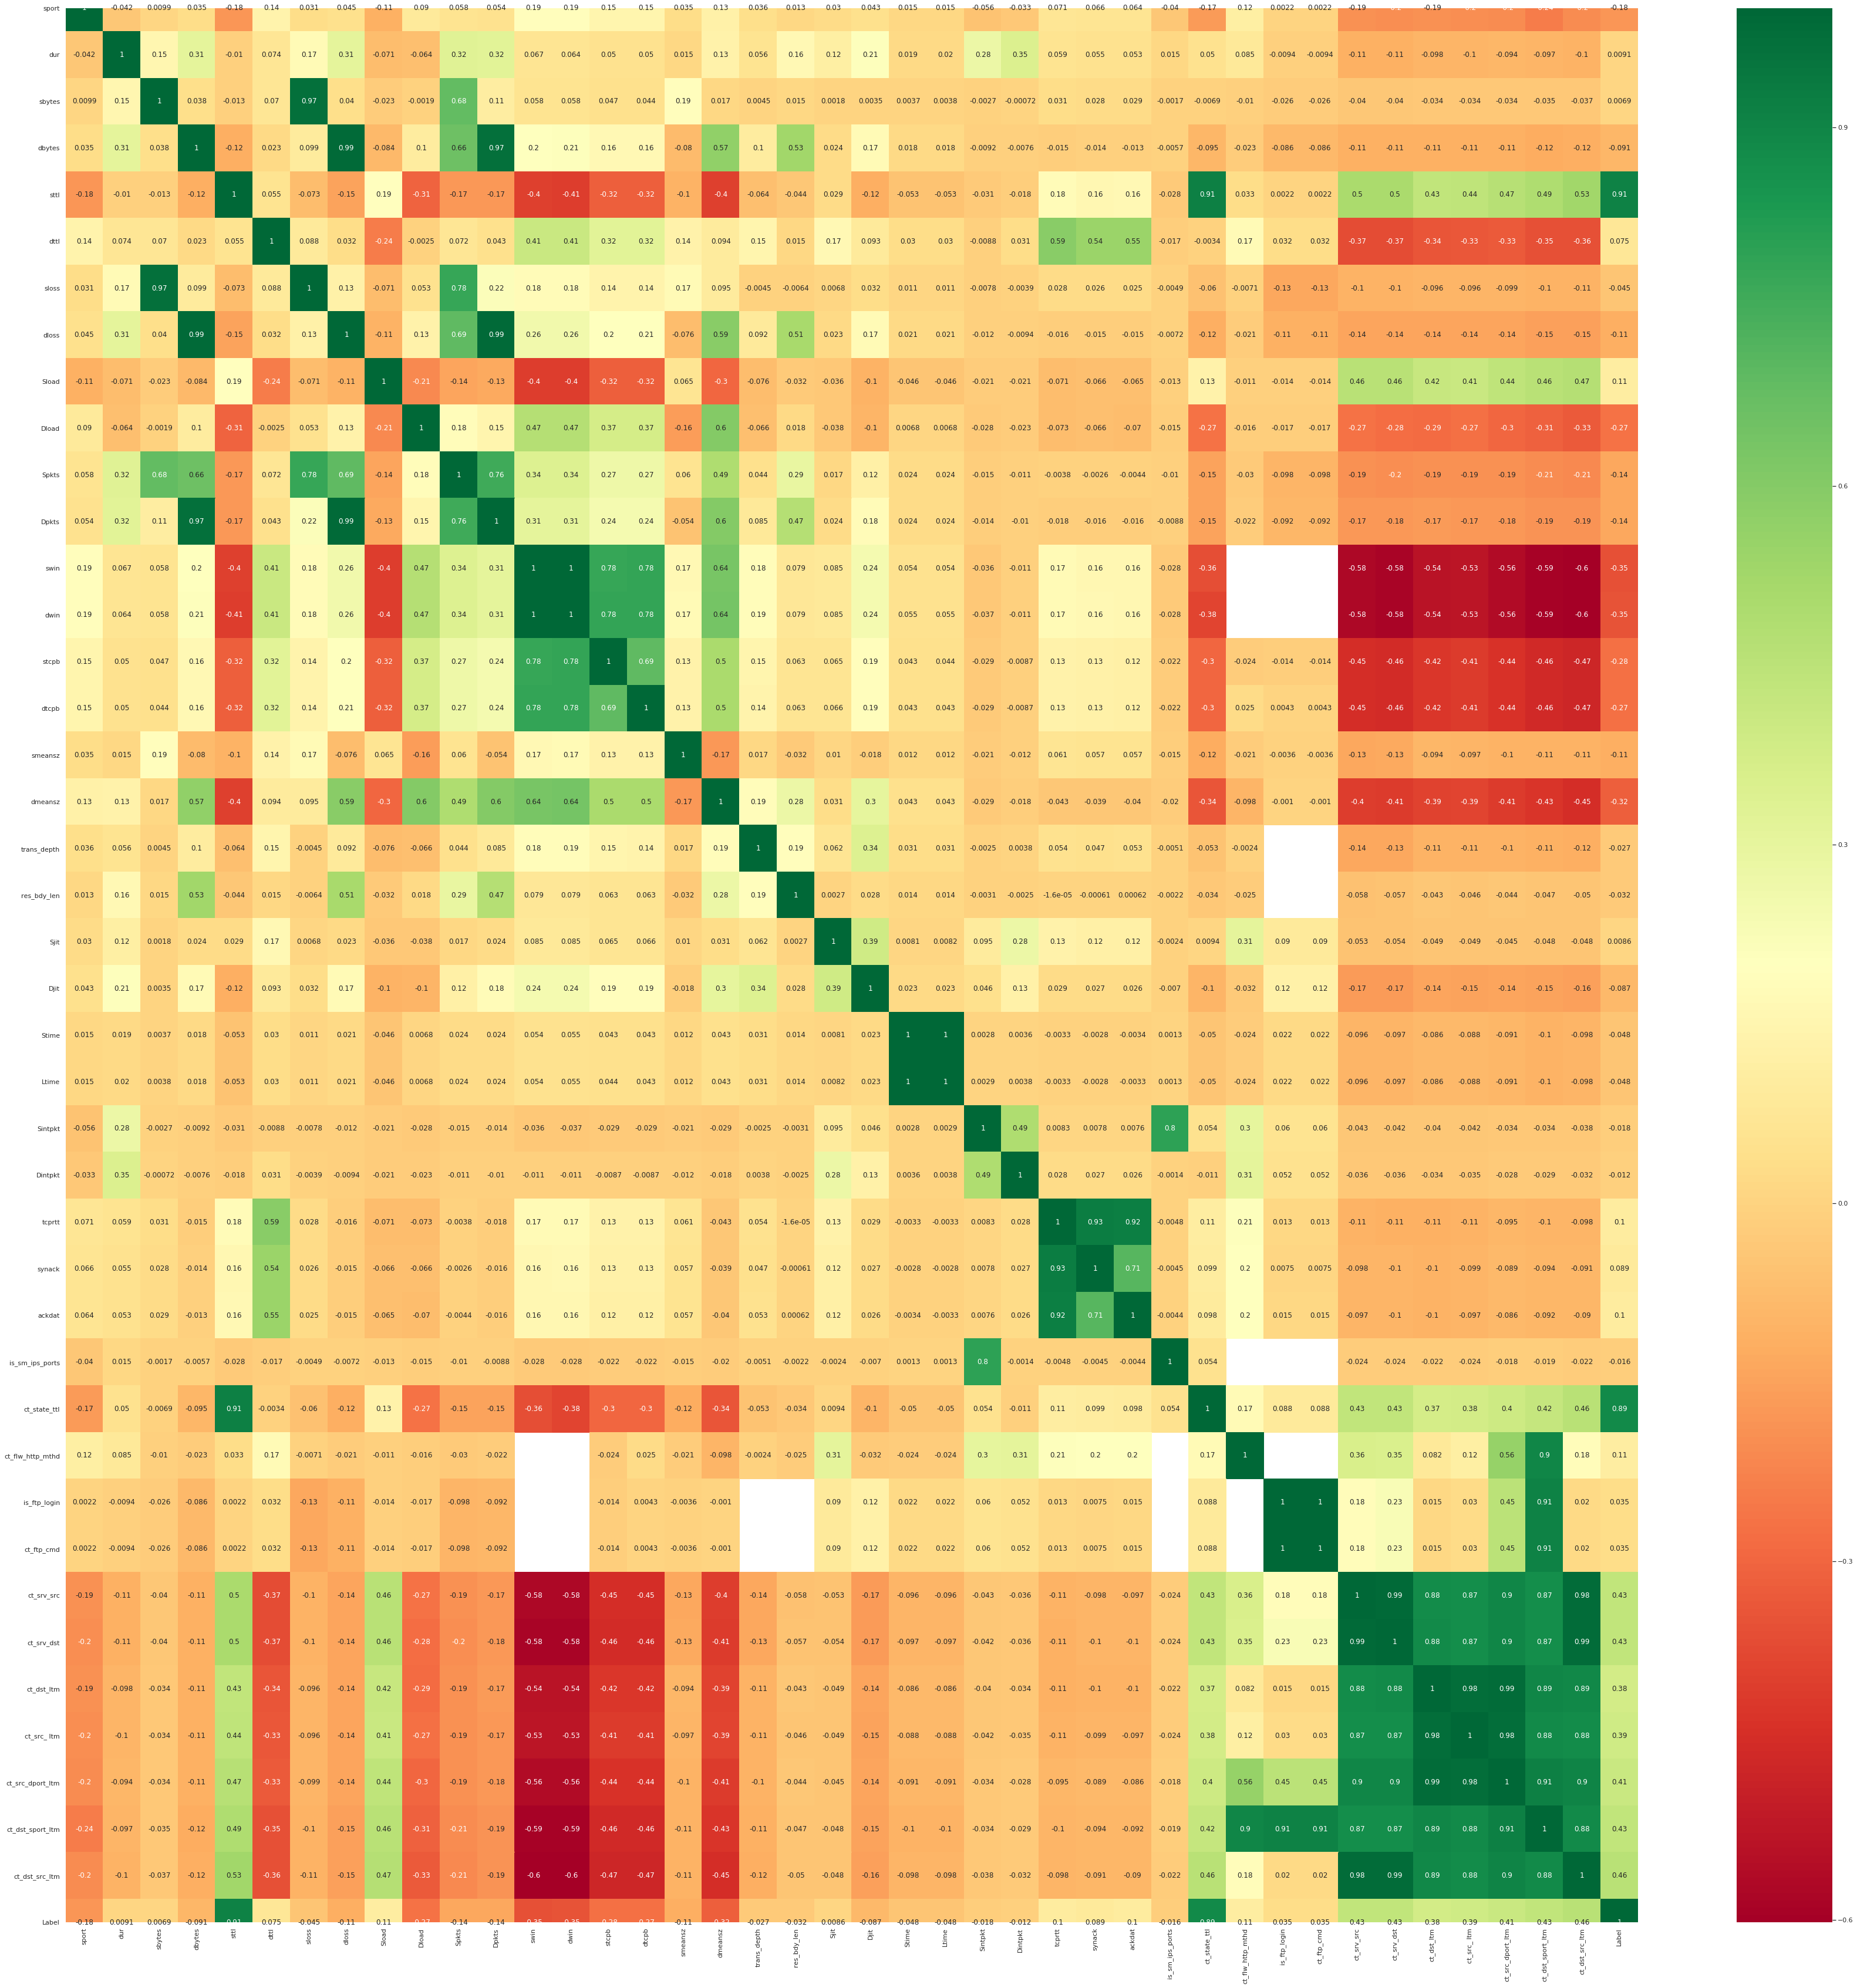

In [0]:
#Correlation matrix
corrmat = dataset.corr()
top_corr_features = corrmat.index
pl.figure(figsize=(60,60))
g=sns.heatmap(dataset[top_corr_features].corr(method='pearson', min_periods=1),annot=True,cmap="RdYlGn")

In [0]:
path = dataset_path+"Dataset/protocol-numbers.csv";
protocol_numbers = pd.read_csv(path, delimiter=',', encoding='utf-8', low_memory=False, skipinitialspace=True, skip_blank_lines=True, verbose=True);

protocol_numbers=protocol_numbers[protocol_numbers.Keyword.notnull()];
protocol_numbers.reindex();

Tokenization took: 0.14 ms
Type conversion took: 0.78 ms
Parser memory cleanup took: 0.01 ms


In [0]:
dataset.insert(2, "sporttype", 0)
dataset.insert(5, "dsporttype", 0)

In [0]:
dataset.sporttype = dataset.sport.astype(int).apply(lambda x: portType(x))
dataset.dsporttype = dataset.dsport.astype(int).apply(lambda x: portType(x))

In [0]:
protocols = dataset.proto.unique();
protocols_json = {};

#for p in protocols:
#  n=-1
#  for r in protocol_numbers.itertuples():
#    if r.Keyword.lower() == p:
#      n = int(r.Decimal);
#      break
#  protocols_json[p] = n;

i=1
for p in protocols:
  protocols_json[p]=i
  i+=1

dataset = dataset.replace({'proto': protocols_json})
print(protocols_json)

{'tcp': 1, 'udp': 2, 'arp': 3, 'ospf': 4, 'udt': 5, 'sctp': 6, 'icmp': 7, 'gre': 8, 'igmp': 9, 'rtp': 10, 'ggp': 11, 'ip': 12, 'ipnip': 13, 'st2': 14, 'argus': 15, 'bbn-rcc': 16, 'chaos': 17, 'egp': 18, 'emcon': 19, 'igp': 20, 'nvp': 21, 'pup': 22, 'xnet': 23, 'cbt': 24, 'mux': 25, 'dcn': 26, 'hmp': 27, 'prm': 28, 'trunk-1': 29, 'trunk-2': 30, 'xns-idp': 31, 'leaf-2': 32, 'leaf-1': 33, 'irtp': 34, 'rdp': 35, 'iso-tp4': 36, 'netblt': 37, 'mfe-nsp': 38, 'merit-inp': 39, 'sep': 40, '3pc': 41, 'idpr': 42, 'xtp': 43, 'ddp': 44, 'idpr-cmtp': 45, 'tp++': 46, 'il': 47, 'ipv6': 48, 'sdrp': 49, 'ipv6-frag': 50, 'ipv6-route': 51, 'idrp': 52, 'rsvp': 53, 'mhrp': 54, 'bna': 55, 'i-nlsp': 56, 'mobile': 57, 'swipe': 58, 'narp': 59, 'skip': 60, 'tlsp': 61, 'ipv6-no': 62, 'ipv6-opts': 63, 'any': 64, 'cftp': 65, 'sat-expak': 66, 'ippc': 67, 'kryptolan': 68, 'rvd': 69, 'visa': 70, 'sat-mon': 71, 'cpnx': 72, 'ipcv': 73, 'cphb': 74, 'wsn': 75, 'pvp': 76, 'br-sat-mon': 77, 'sun-nd': 78, 'wb-mon': 79, 'iso-i

In [0]:
#protocols_mapping = {"udp": 17, "arp": 143, "tcp": 6, "ospf": 89, "icmp": 1, "igmp": 2, "sctp": 132, "udt": 144, "sep": 145, "sun-nd": 77, "swipe": 53, "mobile": 55, "pim": 103, "rtp": 146, "ipnip": 4, "ip": 147, "ggp": 3, "st2": 5, "egp": 8, "cbt": 7, "emcon": 14, "nvp": 11, "igp": 9, "xnet": 15, "argus": 13, "bbn-rcc": 10, "chaos": 16, "pup": 12, "hmp": 20, "mux": 18, "dcn": 19, "prm": 21, "trunk-1": 23, "xns-idp": 22, "trunk-2": 24, "leaf-1": 25, "leaf-2": 26, "irtp": 28, "rdp": 27, "iso-tp4": 29, "netblt": 30, "mfe-nsp": 31, "merit-inp": 32, "3pc": 34, "xtp": 36, "idpr": 35, "tp++": 39, "ddp": 37, "idpr-cmtp": 38, "ipv6": 41, "il": 40, "idrp": 45, "ipv6-frag": 44, "sdrp": 42, "ipv6-route": 43, "gre": 47, "rsvp": 46, "mhrp": 148, "bna": 49, "i-nlsp": 52, "narp": 54, "ipv6-no": 59, "tlsp": 56, "skip": 57, "ipv6-opts": 60, "any": 61, "cftp": 62, "sat-expak": 64, "kryptolan": 65, "rvd": 66, "ippc": 67, "sat-mon": 69, "ipcv": 71, "visa": 70, "cpnx": 72, "cphb": 73, "wsn": 74, "pvp": 75, "br-sat-mon": 76, "wb-mon": 78, "wb-expak": 79, "iso-ip": 80, "secure-vmtp": 82, "vmtp": 81, "vines": 83, "ttp": 84, "nsfnet-igp": 85, "dgp": 86, "tcf": 87, "eigrp": 88, "sprite-rpc": 90, "larp": 91, "mtp": 92, "ax.25": 93, "ipip": 94, "micp": 95, "aes-sp3-d": 149, "encap": 98, "etherip": 97, "pri-enc": 150, "gmtp": 100, "pnni": 102, "ifmp": 101, "aris": 104, "qnx": 106, "a/n": 107, "scps": 105, "snp": 109, "ipcomp": 108, "compaq-peer": 110, "ipx-n-ip": 111, "vrrp": 112, "zero": 151, "pgm": 113, "iatp": 117, "ddx": 116, "l2tp": 115, "srp": 119, "stp": 118, "smp": 121, "uti": 120, "sm": 122, "ptp": 123, "fire": 125, "crtp": 126, "isis": 152, "crudp": 127, "sccopmce": 153, "sps": 130, "pipe": 131, "iplt": 129, "unas": 154, "fc": 133, "ib": 155};

In [0]:
dataset.attack_cat.value_counts()
# for table view -> dataset.groupby(['attack_cat']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

Normal             647250
Generic             27883
Exploits            11103
Fuzzers              4668
DoS                  4637
Reconnaissance       3116
Analysis              608
Backdoor              370
Shellcode             324
Worms                  40
Name: attack_cat, dtype: int64

In [0]:
def isString(item):
  if type(item) is str:
    return item.strip()
  else: return item


attack_mapping = {'Normal': 0, 
                  'Generic': 1, 
                  'Exploits': 2, 
                  'Fuzzers': 3,
                  'Reconnaissance': 4,
                  'DoS': 5,
                  'Backdoors': 6,
                  'Backdoor': 6,
                  'Analysis': 7,
                  'Shellcode': 8,
                  'Worms': 9
                  };

dataset.attack_cat = dataset.attack_cat.apply(lambda x: isString(x))
dataset = dataset.replace({'attack_cat': attack_mapping})

Text(0, 0.5, 'Frequency')

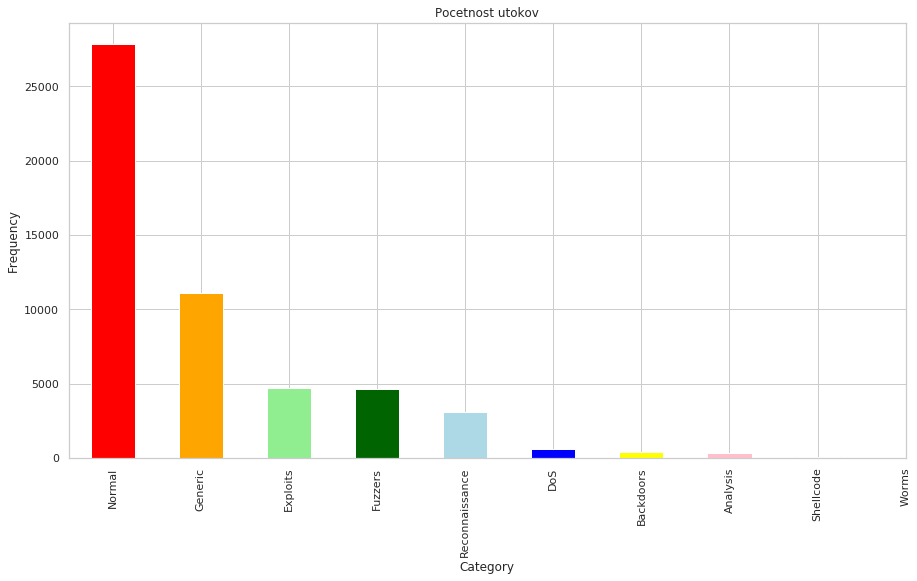

In [0]:
colors = ['red','orange','lightgreen','darkgreen','lightblue','blue','yellow','pink','purple'];
attacks=dataset.loc[dataset.attack_cat.apply(lambda x: x > 0)];
attacks.attack_cat.value_counts().plot(kind='bar', title='Pocetnost utokov', color=colors)
category_labels=['Normal','Generic','Exploits','Fuzzers','Reconnaissance','DoS','Backdoors','Analysis','Shellcode','Worms'];
plt.xticks(range(len(category_labels)), category_labels)
plt.xlabel("Category")
plt.ylabel("Frequency")

In [0]:
dataset.state.value_counts()

FIN    452053
CON    174350
INT     71264
REQ      2034
RST       144
ECO        75
CLO        50
ACC        15
PAR         7
MAS         2
URN         2
TST         1
ECR         1
TXD         1
Name: state, dtype: int64

In [0]:
states = dataset.state.unique();
states_json = {};

i=1
for s in states:
  states_json[s]=i
  i+=1

dataset = dataset.replace({'state': states_json})
print(states_json)

{'FIN': 1, 'CON': 2, 'INT': 3, 'REQ': 4, 'ACC': 5, 'CLO': 6, 'ECO': 7, 'RST': 8, 'URN': 9, 'PAR': 10, 'MAS': 11, 'TST': 12, 'ECR': 13, 'TXD': 14}


In [0]:
dataset.service.value_counts()

NUSER       368320
dns         169660
http         65824
ftp-data     40394
smtp         25860
ssh          15051
ftp          14425
pop3           355
dhcp            37
ssl             32
snmp            27
radius           8
irc              6
Name: service, dtype: int64

In [0]:
services = dataset.service.unique();
services_json = {};

i=1
for s in services:
  services_json[s]=i
  i+=1

dataset = dataset.replace({'service': services_json})
print(services_json)

{'NUSER': 1, 'ftp': 2, 'smtp': 3, 'dns': 4, 'http': 5, 'ssh': 6, 'ftp-data': 7, 'snmp': 8, 'pop3': 9, 'ssl': 10, 'irc': 11, 'dhcp': 12, 'radius': 13}


In [0]:
service_col=dataset.service;
dataset=dataset.drop(columns='service');
dataset.insert(6, "service",service_col);

In [0]:
dataset.insert(1, "srciploc", "")
dataset.insert(5, "dstiploc", "")

In [0]:
dataset.srciploc=dataset.srcip.apply(lambda x: getIPLocation(x));
dataset.dstiploc=dataset.dstip.apply(lambda x: getIPLocation(x));

In [0]:
srcip = dataset.srciploc.unique();
dstip = dataset.dstiploc.unique();
srcip_json = {};
dstip_json = {};

i=1
for ip in srcip:
  srcip_json[ip]=i
  i+=1

for ip in dstip:
  dstip_json[ip]=i
  i+=1

print(srcip_json,dstip_json)

dataset = dataset.replace({'srciploc': srcip_json})
dataset = dataset.replace({'dstiploc': dstip_json})

dataset.srcip = dataset.srciploc
dataset.dstip = dataset.dstiploc
dataset = dataset.drop(columns=['srciploc','dstiploc'])

{'JP': 1, 'Private': 2, 'AU': 3, 'KP': 4} {'AU': 5, 'Private': 6, 'Multicast': 7, 'JP': 8, 'KP': 9, 'US': 10}


In [0]:
# Nominal attributes - One Hot Encoding
# proto, state, service

print("Features before OHE: {}".format(dataset.shape[1]));

ohe_srciploc = pd.get_dummies(dataset.srciploc,prefix='srciploc')
ohe_dstiploc = pd.get_dummies(dataset.dstiploc,prefix='dstiploc')
ohe_protocol = pd.get_dummies(dataset.proto,prefix='proto')
ohe_state = pd.get_dummies(dataset.state,prefix='state')
ohe_service = pd.get_dummies(dataset.service,prefix='service')

dataset = pd.concat([dataset, ohe_srciploc], axis=1)
dataset = pd.concat([dataset, ohe_dstiploc], axis=1)
dataset = pd.concat([dataset, ohe_protocol], axis=1)
dataset = pd.concat([dataset, ohe_state], axis=1)
dataset = pd.concat([dataset, ohe_service], axis=1)

dataset = dataset.drop(columns=['srcip','dstip','srciploc','dstiploc','proto','state','service'])

print("Features after OHE: {}".format(dataset.shape[1]));

Features before OHE: 53
Features after OHE: 216


In [0]:
dataset.reindex()
dataset.index = range(len(dataset))

print("Dataset dimensions {}".format(dataset.shape));

Dataset dimensions (699999, 216)


Text(0, 0.5, 'Frequency')

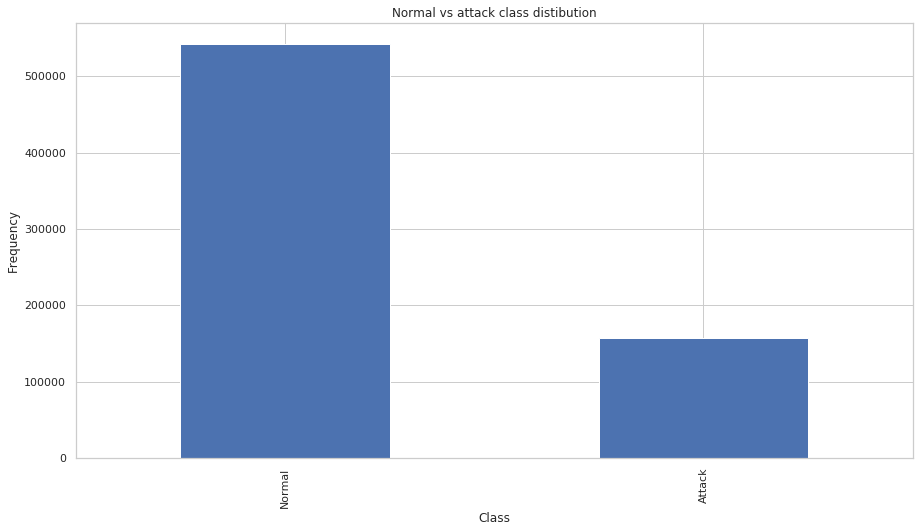

In [0]:
count_classes = pd.value_counts(dataset.Label)
count_classes.plot(kind="bar")
plt.title("Normal vs attack class distibution")
plt.xticks(range(2), ["Normal","Attack"])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [0]:
attack_traffic=dataset[dataset.Label.apply(lambda x: x==1)]
normal_traffic=dataset[dataset.Label.apply(lambda x: x==0)]
print(normal_traffic.shape, attack_traffic.shape)

(542574, 216) (157425, 216)


In [0]:
backup_dataset=dataset

In [0]:
dataset = dataset.drop(columns=['attack_cat']);
dataset.rename(columns={"Label": "label"}, inplace=True);

In [0]:
'''
GridSearchCV - is_ftp_login
{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 20}
'''

nan_cols = dataset.columns[dataset.isna().any()].tolist()
print("NaN columns {}".format(nan_cols))

nans = lambda dataset: dataset[dataset.isnull().any(axis=1)]
nan_rows = nans(dataset)
nan_is_ftp_login_ct_ftp_cmd_1 = nan_rows[nan_rows.ct_ftp_cmd.isnull()]
nan_is_ftp_login_ct_ftp_cmd = nan_is_ftp_login_ct_ftp_cmd_1[nan_is_ftp_login_ct_ftp_cmd_1.is_ftp_login.isnull()]
print("NaN: {}".format(nan_is_ftp_login_ct_ftp_cmd.shape[0]))

not_nans = lambda dataset: dataset[dataset.notnull().any(axis=1)]
not_nan_rows = not_nans(dataset)
not_nan_is_ftp_login_ct_ftp_cmd_1 = not_nan_rows[not_nan_rows.ct_ftp_cmd.notnull()]
not_nan_is_ftp_login_ct_ftp_cmd = not_nan_is_ftp_login_ct_ftp_cmd_1[not_nan_is_ftp_login_ct_ftp_cmd_1.is_ftp_login.notnull()]
print("NOT NaN: {}".format(not_nan_is_ftp_login_ct_ftp_cmd.shape[0]))

X_test = nan_is_ftp_login_ct_ftp_cmd.drop(nan_cols,axis=1)
X_train = not_nan_is_ftp_login_ct_ftp_cmd.drop(nan_cols,axis=1)
y_train = not_nan_is_ftp_login_ct_ftp_cmd.is_ftp_login

'''
n=100000;
n=int(n);
X_train=X_train[:n]
y_train=y_train[:n]
'''
rfr = RandomForestRegressor(bootstrap=False,criterion='mae',max_depth=None,max_features='auto',min_samples_leaf=5,min_samples_split=16,n_estimators=20,n_jobs=-1)
rfr.fit(X_train,y_train)
prediction = rfr.predict(X_test)
prediction=prediction.astype(int)
prediction=prediction.tolist()
dataset.is_ftp_login = dataset.is_ftp_login.apply(lambda x: setPredictedValue() if math.isnan(x) else x)
print("Done")

NaN columns ['ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd']
NaN: 689427
NOT NaN: 10572
Done


In [0]:
'''
GridSearchCV - ct_ftp_cmd
{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 90}
'''

nan_cols = dataset.columns[dataset.isna().any()].tolist()
print("NaN columns {}".format(nan_cols))

nans = lambda dataset: dataset[dataset.isnull().any(axis=1)]
nan_rows = nans(dataset)
nan_ct_ftp_cmd = nan_rows[nan_rows.ct_ftp_cmd.isnull()]
print("NaN: {}".format(nan_ct_ftp_cmd.shape[0]))

not_nans = lambda dataset: dataset[dataset.notnull().any(axis=1)]
not_nan_rows = not_nans(dataset)
not_nan_ct_ftp_cmd = not_nan_rows[not_nan_rows.ct_ftp_cmd.notnull()]
print("NOT NaN: {}".format(not_nan_ct_ftp_cmd.shape[0]))

X_test = nan_ct_ftp_cmd.drop(nan_cols,axis=1)
X_train = not_nan_ct_ftp_cmd.drop(nan_cols,axis=1)
y_train = not_nan_ct_ftp_cmd.ct_ftp_cmd

rfr = RandomForestRegressor(bootstrap=False,criterion='mse',max_depth=None,max_features='auto',min_samples_leaf=5,min_samples_split=11,n_estimators=90,n_jobs=-1)
rfr.fit(X_train,y_train)
prediction = rfr.predict(X_test)

prediction=prediction.astype(int)
prediction=prediction.tolist()

dataset.ct_ftp_cmd = dataset.ct_ftp_cmd.apply(lambda x: setPredictedValue() if math.isnan(x) else x)
print("Done")

NaN columns ['ct_flw_http_mthd', 'ct_ftp_cmd']
NaN: 689427
NOT NaN: 10572
Done


In [0]:
'''
GridSearchCV - ct_flw_http_mthd
{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 15,
 'n_estimators': 120}
'''

nan_cols = dataset.columns[dataset.isna().any()].tolist()
print("NaN columns {}".format(nan_cols))

nans = lambda dataset: dataset[dataset.isnull().any(axis=1)]
nan_rows = nans(dataset)
nan_ct_flw_http_mthd = nan_rows[nan_rows.ct_flw_http_mthd.isnull()]
print("NaN: {}".format(nan_ct_flw_http_mthd.shape[0]))

not_nans = lambda dataset: dataset[dataset.notnull().any(axis=1)]
not_nan_rows = not_nans(dataset)
not_nan_ct_flw_http_mthd = not_nan_rows[not_nan_rows.ct_flw_http_mthd.notnull()]
print("NOT NaN: {}".format(not_nan_ct_flw_http_mthd.shape[0]))

X_test = nan_ct_flw_http_mthd.drop(nan_cols,axis=1)
X_train = not_nan_ct_flw_http_mthd.drop(nan_cols,axis=1)
y_train = not_nan_ct_flw_http_mthd.ct_flw_http_mthd

'''
n=100000;
n=int(n);
X_train=X_train[:n]
y_train=y_train[:n]
'''
rfr = RandomForestRegressor(bootstrap=True,criterion='mae',max_depth=90,max_features='sqrt',min_samples_leaf=3,min_samples_split=15,n_estimators=120,n_jobs=-1)
rfr.fit(X_train,y_train)
prediction = rfr.predict(X_test)

prediction=prediction.astype(int)
prediction=prediction.tolist()

dataset.ct_flw_http_mthd = dataset.ct_flw_http_mthd.apply(lambda x: setPredictedValue() if math.isnan(x) else x)
print("Done")

NaN columns ['ct_flw_http_mthd']
NaN: 656403
NOT NaN: 43596
Done


In [0]:
label_col = dataset.label;
dataset_without_labels = dataset.drop(columns=['label'])
#unchanged_dataset = dataset[dataset.columns[:8]]

#dataset_norm = dataset_without_labels[dataset_without_labels.columns[8:]]
dataset_norm = dataset_without_labels
names = dataset_norm.columns

scaler = preprocessing.StandardScaler()
scaled_dataset = scaler.fit_transform(dataset_norm)
scaled_dataset = pd.DataFrame(scaled_dataset, columns=names)
dataset_norm.update(scaled_dataset)

#norm_dataset = pd.concat([unchanged_dataset, dataset_norm.reindex(unchanged_dataset.index)], axis=1)
dataset_norm['label'] = label_col

dataset = dataset_norm

In [0]:
X = dataset.drop('label', axis=1)
y = dataset.label

print(X.shape, y.shape)

(699999, 214) (699999,)


In [0]:
# Resampling

print("Original dataset categories shape {}".format(sorted(Counter(y).items())))

pipe = make_pipeline(SMOTE(sampling_strategy='auto',random_state=0,n_jobs=5), ADASYN(sampling_strategy='auto',random_state=0,n_jobs=5))
X_resampled, Y_resampled = pipe.fit_resample(X,y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_dataset = X_resampled_df.assign(attack_cat=pd.Series(Y_resampled))

print("Resampled dataset categories shape {}".format(sorted(Counter(Y_resampled).items())))
print("Resampled dataset size: {}".format(resampled_dataset.shape[0]))

In [0]:
total_features=dataset.shape[1];
total_rows=dataset.shape[0];
normal_traffic_rows=normal_traffic.shape[0];
normal_traffic_per=(100*normal_traffic_rows)/total_rows;
attack_traffic_rows=attack_traffic.shape[0];
attack_traffic_per=(100*attack_traffic_rows)/total_rows;

print("Total rows: {}\nTotal features: {}\nNormal traffic: {} ({} %)\nAttack traffic: {} ({} %)".format(total_rows, total_features, normal_traffic_rows, normal_traffic_per, attack_traffic_rows, attack_traffic_per));

Total rows: 699999
Total features: 215
Normal traffic: 542574 (77.51068215811736 %)
Attack traffic: 157425 (22.48931784188263 %)


In [0]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
pl.figure(figsize=(60,60))
g=sns.heatmap(dataset[top_corr_features].corr(method='pearson', min_periods=1),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Selected Top 10 Features
srciploc_KP     0.232260
sttl            0.156954
srciploc_AU     0.117282
srciploc_JP     0.105823
ct_state_ttl    0.053146
dttl            0.044551
proto_tcp       0.037549
dstiploc_KP     0.030910
state_FIN       0.025046
ct_src_ ltm     0.021111
dtype: float64


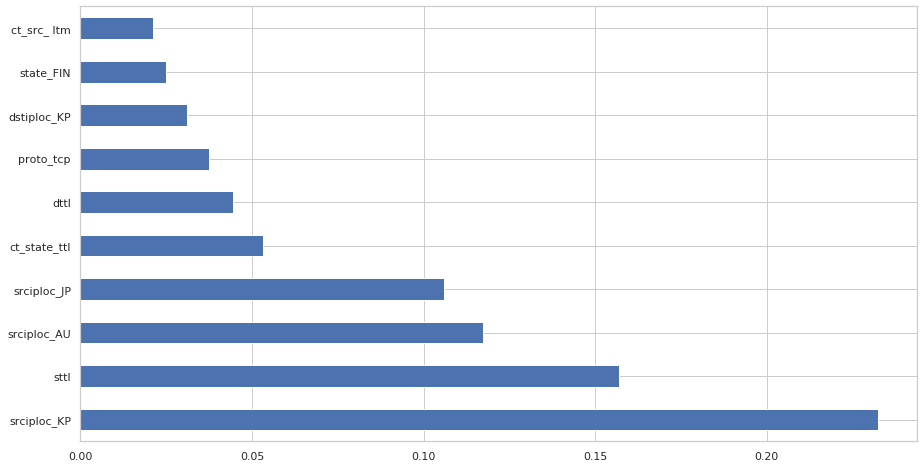

In [0]:
extraTreesClassifier_model = ExtraTreesClassifier()
extraTreesClassifier_model.fit(X,y)

feat_importances = pd.Series(extraTreesClassifier_model.feature_importances_, index=X.columns)
nof = 10
topFeatures = feat_importances.nlargest(nof)
print("Selected Top {} Features\n{}".format(nof,topFeatures))

topFeatures.plot(kind='barh')
plt.show()

In [0]:
selectedFeatures = ['srciploc_AU','srciploc_KP','dstiploc_KP','srciploc_JP','state_INT','ct_state_ttl','ct_ftp_cmd','is_ftp_login','ct_flw_http_mthd','ct_srv_src','ct_dst_src_ltm','sttl','dttl','dwin','label']
dataset_selectedFeatures = dataset[selectedFeatures]

In [0]:
from google.colab import files
dataset.to_csv('dataset_x.csv', index=False)

In [0]:
# Basic RandomisedSearch params
#{'bootstrap': [True, False],
# 'criterion': ['mse', 'mae'],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt', 'log2'],
# 'min_samples_leaf': [2, 4, 6, 8, 10],
# 'min_samples_split': [5, 10, 15, 20],
# 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
'''
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [5, 10, 15, 20]
min_samples_leaf = [2, 4, 6, 8, 10]
bootstrap = [True, False]
criterion = ['mse', 'mae']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

pprint(random_grid)

model = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 10, n_jobs=-1, verbose=2)
randomForestRegressor_randomSearch = random_search.fit(X_train, y_train)

pprint(randomForestRegressor_randomSearch.best_params_)
'''

In [0]:
'''
is_ftp_login

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 15,
 'n_estimators': 10}

ct_ftp_cmd 

 {'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 80}

ct_flw_http_mthd

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

'''
'''
params = {'n_estimators': [20,30,40],
          'max_features': ['auto'],
          'max_depth': [None],
          'min_samples_split': [16,18],
          'min_samples_leaf': [5,7],
          'bootstrap': [False],
          'criterion': ['mae']}

params = {'n_estimators': [90,100,110],
          'max_features': ['auto'],
          'max_depth': [None],
          'min_samples_split': [11,13,15],
          'min_samples_leaf': [5,7,8],
          'bootstrap': [False],
          'criterion': ['mse']}

params = {'n_estimators': [110,120],
          'max_features': ['sqrt'],
          'max_depth': [90,110],
          'min_samples_split': [11,15],
          'min_samples_leaf': [3,5],
          'bootstrap': [True],
          'criterion': ['mae']}

model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid = params, cv = 3, n_jobs=-1, verbose = 2)
randomForestRegressor_gridSearch = grid_search.fit(X_train, y_train)

pprint(randomForestRegressor_gridSearch.best_params_)
'''

In [0]:
'''
print("Original dataset categories shape {}".format(sorted(Counter(Y).items())))

pipe = make_pipeline(SMOTE(sampling_strategy='auto',random_state=41,n_jobs=5), ADASYN(sampling_strategy='auto',random_state=41,n_jobs=5))
X_resampled, Y_resampled = pipe.fit_resample(X,Y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_dataset = X_resampled_df.assign(attack_cat=pd.Series(Y_resampled))

print("Resampled dataset categories shape {}".format(sorted(Counter(Y_resampled).items())))
'''

In [0]:
#--------------------------------------------------------------------

In [0]:
'''
test=dataset[dataset.sbytes.astype(int).apply(lambda x: x>450)]
print("Source to destination transaction bytes");
print("Normal traffic: {}".format(test[test.label.apply(lambda x: x==0)].shape));
print("Attack traffic: {}".format(test[test.label.apply(lambda x: x==1)].shape))

makePlot(dataset.index.astype(int),dataset.sbytes,"Source to destination transaction bytes",450);

test=dataset[dataset.dbytes.astype(int).apply(lambda x: x>650)]
print("Destination to source transaction bytes");
print("Normal traffic: {}".format(test[test.Label.apply(lambda x: x==0)].shape));
print("Attack traffic: {}".format(test[test.Label.apply(lambda x: x==1)].shape))

makePlot(dataset.index.astype(int),dataset.dbytes,"Destination to source transaction bytes",650);

#sbytes,dbytes and sloss,dloss are in corelation (probably - check it out). All the records are attacs and due to that can not be removed.

#450 for sloss
#650 for dloss

#Data normalization should be applied to sbytes, sloss, dloss, sttl, dttl
'''